In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
ls "/gdrive/MyDrive/Colab Notebooks/moorsfield_eye_hospital"


ls: cannot access '/gdrive/MyDrive/Colab Notebooks/moorsfield_eye_hospital': No such file or directory


In [ ]:
import os
import cv2
from matplotlib import pyplot as plt

In [ ]:
# !pip install --force-reinstall keras==2.9.0

In [ ]:
# !git clone https://github.com/qubvel/efficientnet.git
import numpy as np
import pandas as pd
import gc
import keras

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
sns.set_style("white")

from sklearn.model_selection import train_test_split,StratifiedKFold

from skimage.transform import resize
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.losses import binary_crossentropy

from tensorflow.keras.preprocessing.image import load_img
from keras import Model
from tensorflow.keras.callbacks import  ModelCheckpoint
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from tensorflow.keras.layers import Conv2D, Concatenate, MaxPooling2D
from tensorflow.keras.layers import UpSampling2D, Dropout, BatchNormalization
from tqdm import tqdm_notebook
from keras import initializers
from keras import regularizers
from keras import constraints
from keras import backend as K
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.losses import binary_crossentropy
import tensorflow.keras.callbacks as callbacks
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import multiply
from keras.layers.merge import concatenate, add
from keras.layers import Input,Dropout,BatchNormalization,Activation,Add
from keras import optimizers


import glob
import shutil
import os
import random
from PIL import Image

seed = 10
np.random.seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
    
%matplotlib inline

In [ ]:
# def img_standardization(x):
#       imagenet_mean = np.array([0.485, 0.456, 0.406])
#       imagenet_std = np.array([0.229, 0.224, 0.225])
#       x=x.astype('float16')/255.
#       return ((x-imagenet_mean)/imagenet_std)
def img_standardization(x):
      return x.astype('float32')/255.0

In [ ]:
git_path=os.path.join("/gdrive/MyDrive/Colab Notebooks/moorsefield/","SegmentationAssignment-main")
os.chdir(git_path)

In [ ]:
ls

moorsfield_eye_problem_bc_loss.csv
moorsfield_eye_problem_bc_loss.hdf5
moorsfield_eye_problem_bc_loss_irf_large.csv
moorsfield_eye_problem_bc_loss_irf_large.hdf5
moorsfield_eye_problem_bc_loss_sav_on_dice.csv
moorsfield_eye_problem_bc_loss_sav_on_dice.hdf5
moorsfield_eye_problem_bc_loss_uxception.csv
moorsfield_eye_problem_bc_loss_uxception.hdf5
moorsfield_eye_problem_dice_loss2.csv
moorsfield_eye_problem_dice_loss2.hdf5
moorsfield_eye_problem_dice_loss_bc.csv
moorsfield_eye_problem_dice_loss_bc.hdf5
moorsfield_eye_problem_dice_loss.csv
moorsfield_eye_problem_dice_loss.hdf5
moorsfield_eye_problem_dice_loss_irf2.csv
moorsfield_eye_problem_dice_loss_irf2.hdf5
moorsfield_eye_problem_dice_loss_irf.csv
moorsfield_eye_problem_dice_loss_irf_gb.csv
moorsfield_eye_problem_dice_loss_irf_gb.hdf5
moorsfield_eye_problem_dice_loss_irf.hdf5
moorsfield_eye_problem_dice_loss_irf_large.csv
moorsfield_eye_problem_dice_loss_irf_large.hdf5
moorsfield_eye_problem_dice_loss_irf_large_img2.csv
moorsfield_eye_

In [ ]:
input_img_folder=os.path.join(git_path,"sample","oct")
output1_img_folder=os.path.join(git_path,"sample","irf")
output2_img_folder=os.path.join(git_path,"sample","srf")

In [ ]:
input_img_files=os.listdir(input_img_folder)
output1_img_files=os.listdir(input_img_folder)
output2_img_files=os.listdir(input_img_folder)


In [ ]:
ip_img=plt.imread(os.path.join(input_img_folder,input_img_files[0]))
op_img1=plt.imread(os.path.join(output1_img_folder,output1_img_files[0]))
op_img2=plt.imread(os.path.join(output2_img_folder,output2_img_files[0]))

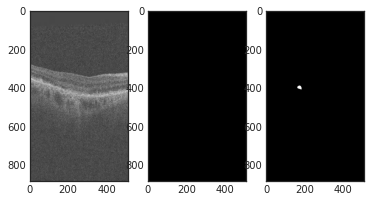

In [ ]:
plt.figure()
plt.subplot(131)
plt.imshow(ip_img,cmap='gray')
plt.subplot(132)
plt.imshow(op_img1,cmap='gray')
plt.subplot(133)
plt.imshow(op_img2,cmap='gray')
plt.show()

In [ ]:
positive_img_stack=[]
blank_img_stack=[]
img_stack=[]

for index in range(len(input_img_files)):
  temp_ip_img_file=input_img_files[index]
  if temp_ip_img_file in output1_img_files and temp_ip_img_file in output2_img_files:
    temp_ip_img=cv2.resize(cv2.imread(os.path.join(input_img_folder,  input_img_files[index])),(512,768),interpolation=cv2.INTER_CUBIC)
    # temp_ip_img = cv2.medianBlur(temp_ip_img,9)
    temp_ip_img=cv2.fastNlMeansDenoisingColored(temp_ip_img, None, 15, 10, 7, 21)
    temp_op_img1=cv2.resize(cv2.imread(os.path.join(output1_img_folder, input_img_files[index]),0),(512,768),interpolation=cv2.INTER_CUBIC)
    # temp_op_img2=cv2.resize(cv2.imread(os.path.join(output2_img_folder, input_img_files[index]),0),(512,512))
    if np.sum(temp_op_img1)<200:#or np.sum(temp_op_img2):
      pass
      blank_img_stack.append((temp_ip_img,temp_op_img1))
    else:
      positive_img_stack.append((temp_ip_img,temp_op_img1))
      # img_stack.append((temp_ip_img,temp_op_img1))

In [ ]:
# len(blank_img_stack),len(positive_img_stack)
len(img_stack)

In [ ]:
# np.sum(temp_op_img1)

In [ ]:
# img_array=np.array(img_stack)

# random.shuffle(img_stack)
random.shuffle(blank_img_stack)
random.shuffle(positive_img_stack)

In [ ]:
train_split1=int(np.floor(len(blank_img_stack)*0.7))
# val_split1=int(np.floor(len(img_stack)*0.8))

train_split2=int(np.floor(len(positive_img_stack)*0.7))
# val_split2=int(np.floor(len(img_stack)*0.8))
# test_split=int(len(img_array)*0.7)


train_set=blank_img_stack[:train_split1]+positive_img_stack[:train_split2]
val_set=blank_img_stack[train_split1:]+positive_img_stack[train_split2:]


In [ ]:
train_set[0][1].shape

In [ ]:
x_train=[]
y_train=[]

for index in range(len(train_set)):
    x_train.append(img_standardization(train_set[index][0]))
    
    y_train.append(np.expand_dims(np.around(train_set[index][1].astype('float32')/255.0),-1))

x_train=np.array(x_train)
y_train=np.array(y_train)



In [ ]:
# print(x_train.shape,y_train.shape,x_train[0].dtype,y_train[0].dtype)
# case_check=20
# plt.figure()
# plt.subplot(131)
# plt.imshow(x_train[case_check,:,:,:].astype('uint8'),cmap='gray')
# plt.subplot(132)
# plt.imshow(y_train[case_check,:,:],cmap='gray')
# plt.show()

In [ ]:
x_val=[]
y_val=[]

for index in range(len(val_set)):
    x_val.append(img_standardization(val_set[index][0]))
    # y_val.append(val_set[index][1].astype('float32'))
    y_val.append(np.expand_dims(np.around(val_set[index][1].astype('float32')/255.),-1))

x_val=np.array(x_val)
y_val=np.array(y_val)



In [ ]:
# print(x_val.shape,y_val.shape,x_val[0].dtype,y_val[0].dtype,)

# case_check=10
# for case_check in range(len(y_val)):
#   plt.figure()
#   plt.subplot(131)
#   plt.imshow(x_val[case_check,:,:,:],cmap='gray')
#   plt.subplot(132)
#   plt.imshow(y_val[case_check,:,:],cmap='gray')
#   plt.show()

In [ ]:
# np.sum(y_val[case_check,:,:])

In [ ]:
# x_test=[]
# y_test=[]

# for index in range(len(test_set)):
#     x_test.append(img_standardization(test_set[index][0]))
#     # y_test.append(test_set[index][1].astype('float32'))
#     y_test.append(np.expand_dims(test_set[index][1].astype('float32')/255.,-1))

# x_test=np.array(x_test)
# y_test=np.array(y_test)



In [ ]:
# x_test.shape,y_test.shape, x_test[0].dtype,y_test[0].dtype

In [ ]:
def convolution_block(x, filters, size, strides=(1,1), padding='same', activation=True):
    x = Conv2D(filters, size, strides=strides, padding=padding)(x)
    x = BatchNormalization()(x)
    if activation == True:
        x = LeakyReLU(alpha=0.1)(x)
    return x

def residual_block(blockInput, num_filters=16):
    x = LeakyReLU(alpha=0.1)(blockInput)
    x = BatchNormalization()(x)
    blockInput = BatchNormalization()(blockInput)
    x = convolution_block(x, num_filters, (3,3) )
    x = convolution_block(x, num_filters, (3,3), activation=False)
    x = Add()([x, blockInput])
    return x

In [ ]:
def UXception(input_shape=(None, None, 3),dropout_rate=0.5):

    backbone = Xception(input_shape=input_shape,include_top=False)
    input = backbone.input
    start_neurons = 16

    conv4 = backbone.layers[121].output
    conv4 = LeakyReLU(alpha=0.1)(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)
    pool4 = Dropout(dropout_rate)(pool4)
    
     # Middle
    convm = Conv2D(start_neurons * 32, (3, 3), activation=None, padding="same")(pool4)
    convm = residual_block(convm,start_neurons * 32)
    convm = residual_block(convm,start_neurons * 32)
    convm = LeakyReLU(alpha=0.1)(convm)
    
    deconv4 = Conv2DTranspose(start_neurons * 16, (3, 3), strides=(2, 2), padding="same")(convm)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = Dropout(dropout_rate)(uconv4)
    
    uconv4 = Conv2D(start_neurons * 16, (3, 3), activation=None, padding="same")(uconv4)
    uconv4 = residual_block(uconv4,start_neurons * 16)
    uconv4 = residual_block(uconv4,start_neurons * 16)
    uconv4 = LeakyReLU(alpha=0.1)(uconv4)
    
    deconv3 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(uconv4)
    conv3 = backbone.layers[31].output
    uconv3 = concatenate([deconv3, conv3])    
    uconv3 = Dropout(dropout_rate)(uconv3)
    
    uconv3 = Conv2D(start_neurons * 8, (3, 3), activation=None, padding="same")(uconv3)
    uconv3 = residual_block(uconv3,start_neurons * 8)
    uconv3 = residual_block(uconv3,start_neurons * 8)
    uconv3 = LeakyReLU(alpha=0.1)(uconv3)

    deconv2 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(uconv3)
    conv2 = backbone.layers[21].output
    conv2 = ZeroPadding2D(((1,0),(1,0)))(conv2)
    uconv2 = concatenate([deconv2, conv2])
        
    uconv2 = Dropout(0.1)(uconv2)
    uconv2 = Conv2D(start_neurons * 4, (3, 3), activation=None, padding="same")(uconv2)
    uconv2 = residual_block(uconv2,start_neurons * 4)
    uconv2 = residual_block(uconv2,start_neurons * 4)
    uconv2 = LeakyReLU(alpha=0.1)(uconv2)
    
    deconv1 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv2)
    conv1 = backbone.layers[11].output
    conv1 = ZeroPadding2D(((3,0),(3,0)))(conv1)
    uconv1 = concatenate([deconv1, conv1])
    
    uconv1 = Dropout(0.1)(uconv1)
    uconv1 = Conv2D(start_neurons * 2, (3, 3), activation=None, padding="same")(uconv1)
    uconv1 = residual_block(uconv1,start_neurons * 2)
    uconv1 = residual_block(uconv1,start_neurons * 2)
    uconv1 = LeakyReLU(alpha=0.1)(uconv1)
    
    uconv0 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv1)   
    uconv0 = Dropout(dropout_rate)(uconv0)
    uconv0 = Conv2D(start_neurons * 1, (3, 3), activation=None, padding="same")(uconv0)
    uconv0 = residual_block(uconv0,start_neurons * 1)
    uconv0 = residual_block(uconv0,start_neurons * 1)
    uconv0 = LeakyReLU(alpha=0.1)(uconv0)
    
    uconv0 = Dropout(dropout_rate/2)(uconv0)
    output_layer = Conv2D(1, (1,1), padding="same", activation="sigmoid")(uconv0)    
    
    model = Model(input, output_layer)
    # model.name = 'u-xception'

    return model

    

In [ ]:
# from keras.models import Model, load_model
# from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
# from keras.layers.convolutional import Conv2D, Conv2DTranspose
# from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
# from keras.layers.merge import concatenate, add

def conv2d_block(input_tensor, n_filters, kernel_size=3, batchnorm=True):
    # first layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # second layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(x)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x


def get_unet(input_img, n_filters=16, dropout=0.5, batchnorm=True):
    # contracting path
    c1 = conv2d_block(input_img, n_filters=n_filters * 1, kernel_size=3, batchnorm=batchnorm)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout * 0.5)(p1)

    c2 = conv2d_block(p1, n_filters=n_filters * 2, kernel_size=3, batchnorm=batchnorm)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)

    c3 = conv2d_block(p2, n_filters=n_filters * 4, kernel_size=3, batchnorm=batchnorm)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)

    c4 = conv2d_block(p3, n_filters=n_filters * 8, kernel_size=3, batchnorm=batchnorm)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
    p4 = Dropout(dropout)(p4)

    c5 = conv2d_block(p4, n_filters=n_filters * 16, kernel_size=3, batchnorm=batchnorm)

    # expansive path
    u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters=n_filters * 8, kernel_size=3, batchnorm=batchnorm)

    u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters=n_filters * 4, kernel_size=3, batchnorm=batchnorm)

    u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters=n_filters * 2, kernel_size=3, batchnorm=batchnorm)

    u9 = Conv2DTranspose(n_filters * 1, (3, 3), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters=n_filters * 1, kernel_size=3, batchnorm=batchnorm)

    outputs = Conv2D(1,(1,1), activation='sigmoid')(c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

In [ ]:
K.clear_session()
# model = UXception(input_shape=(512,512,3))

input_img = Input((768, 512, 3), name='img')
model = get_unet(input_img, n_filters=16, dropout=0.25, batchnorm=False)

In [ ]:
# model.summary()

In [ ]:
from tensorflow.keras.optimizers import Adam

def dice_loss(y_true, y_pred):
    smooth = 1e-5
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = y_true_f * y_pred_f
    score = (2. * K.sum(intersection) + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return 1. - score

def bce_dice_loss(y_true, y_pred):
    return (binary_crossentropy(y_true, y_pred)+dice_loss(y_true, y_pred))



def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (K.sum(K.square(y_true), -1) + K.sum(K.square(y_pred), -1) + smooth)

def generalised_dice_loss_2d(y_true, y_pred):
    smooth = 1e-5
    w = tf.reduce_sum(y_true, axis=[1, 2])
    w = 1 / (w ** 2 + smooth)

    numerator = y_true * y_pred
    numerator = w * tf.reduce_sum(numerator, axis=[1, 2])
    numerator = tf.reduce_sum(numerator, axis=1)

    denominator = y_pred + y_true
    denominator = w * tf.reduce_sum(denominator, axis=[1, 2])
    denominator = tf.reduce_sum(denominator, axis=1)

    gen_dice_coef = 2 * numerator / (denominator + smooth)
    loss = tf.reduce_mean(1 - gen_dice_coef)
    return loss

def tversky(y_true, y_pred,smooth=1):
    y_true_pos = K.flatten(y_true)
    y_pred_pos = K.flatten(y_pred)
    true_pos = K.sum(y_true_pos * y_pred_pos)
    false_neg = K.sum(y_true_pos * (1-y_pred_pos))
    false_pos = K.sum((1-y_true_pos)*y_pred_pos)
    alpha = 0.7
    return (true_pos + smooth)/(true_pos + alpha*false_neg + (1-alpha)*false_pos + smooth)

def tversky_loss(y_true, y_pred):
    return 1 - tversky(y_true,y_pred)

adam=Adam(lr=1e-4)
# model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy',dice_coef])
model.compile(optimizer=adam,loss=tversky_loss,metrics=['accuracy',dice_coef])
# model.compile(optimizer=adam,loss=generalised_dice_loss_2d,metrics=['accuracy',dice_coef])

#Callback for saving model weights based on minimum Validation loss 
from keras.callbacks import LearningRateScheduler,ReduceLROnPlateau,CSVLogger,ModelCheckpoint,EarlyStopping

model_checkpoint = ModelCheckpoint(
        # os.path.join('./', 'moorsfield_eye_problem_bc_loss_irf_large.hdf5'),
        os.path.join('./', 'moorsfield_eye_problem_tversky_loss_irf_large.hdf5'),
        monitor='val_dice_coef', mode='max',save_best_only=True, verbose=1)
        # monitor='val_loss', mode='min',save_best_only=True, verbose=1)

#Callback for reducing learning rate based on validation loss
reduce_lr = ReduceLROnPlateau(monitor='val_dice_coef', factor=0.1,patience=4, verbose=1, min_lr=1e-6)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=4, verbose=1, min_lr=1e-6)

#Callback for storing logs of learning rate, loss and accuracy
csvlogger=CSVLogger('moorsfield_eye_problem_dice_loss_irf_large.csv')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

callbacks = [model_checkpoint,reduce_lr,csvlogger]



In [ ]:
tf.config.run_functions_eagerly(True)


In [ ]:
model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=150,verbose=1,callbacks=callbacks,batch_size=4,shuffle=True)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/150
29/29 [==============================] - ETA: 0s - loss: 0.9960 - accuracy: 0.5212 - dice_coef: 0.7437
Epoch 1: val_dice_coef improved from 0.87967 to 0.90608, saving model to ./moorsfield_eye_problem_tversky_loss_irf_large.hdf5
29/29 [==============================] - 13s 462ms/step - loss: 0.9960 - accuracy: 0.5212 - dice_coef: 0.7437 - val_loss: 0.9967 - val_accuracy: 0.9867 - val_dice_coef: 0.9061 - lr: 1.0000e-04
Epoch 2/150
29/29 [==============================] - ETA: 0s - loss: 0.9959 - accuracy: 0.5829 - dice_coef: 0.7681
Epoch 2: val_dice_coef improved from 0.90608 to 0.93107, saving model to ./moorsfield_eye_problem_tversky_loss_irf_large.hdf5
29/29 [==============================] - 13s 435ms/step - loss: 0.9959 - accuracy: 0.5829 - dice_coef: 0.7681 - val_loss: 0.9959 - val_accuracy: 0.9653 - val_dice_coef: 0.9311 - lr: 1.0000e-04
Epoch 3/150
29/29 [==============================] - ETA: 0s - loss: 0.9938 - accuracy: 0.9118 - dice_coef: 0.9288
Epoch 3: val_dice

KeyboardInterrupt: ignored

In [ ]:
# model.load_weights('./moorsfield_eye_problem_bc_loss_irf_large.hdf5')
model.load_weights('./moorsfield_eye_problem_tversky_loss_irf_large.hdf5')
# for files in os.listdir(git_path):
#   if '.hdf5' in files
#     model.load_weights('./moorsfield_eye_problem_dice_loss_irf_large_img2.hdf5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


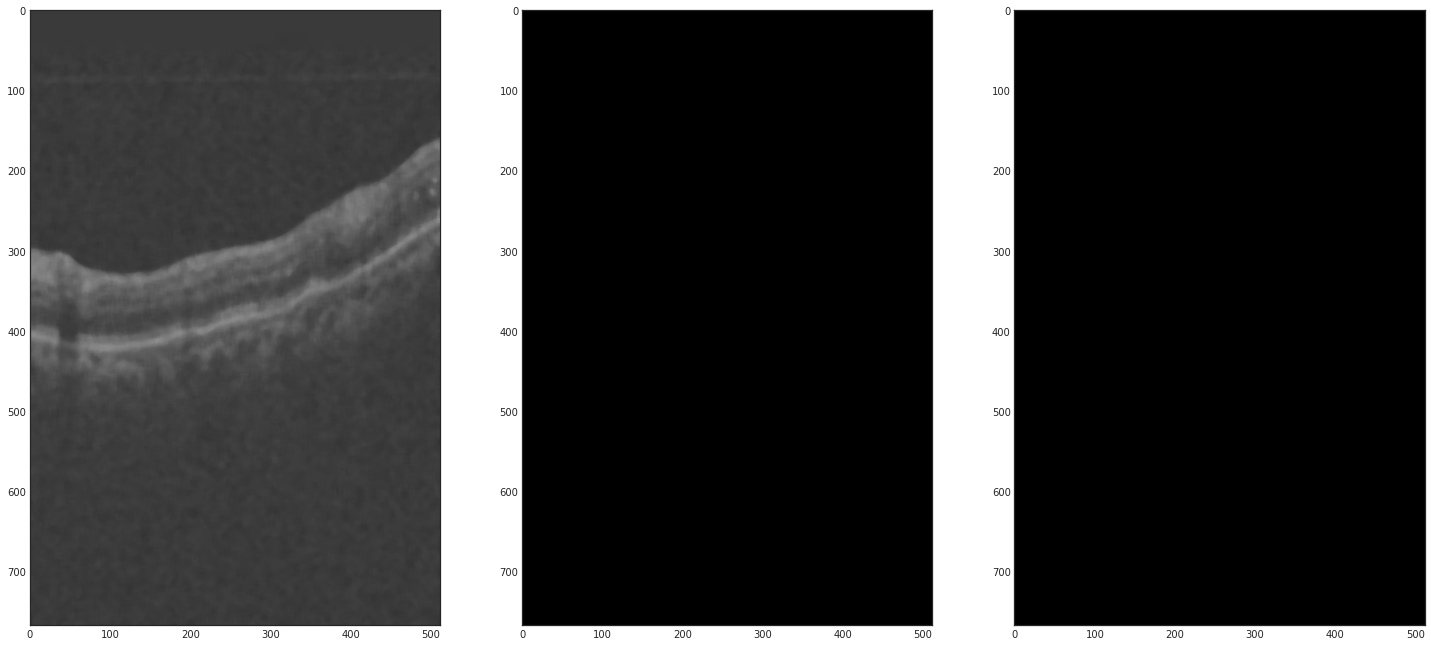

In [ ]:
test_index=1
# for test_index in range(len(x_train)):
op_train=model.predict(np.expand_dims(x_train[test_index],0))

plt.figure(figsize=(25,25))
plt.subplot(131)
plt.imshow((x_train[test_index]*255).astype('uint8'),cmap='gray')
plt.subplot(132)
plt.imshow(y_train[test_index][:,:,0],cmap='gray')
plt.subplot(133)
plt.imshow(np.around(op_train[0,:,:,0]),cmap='gray')
plt.show()


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


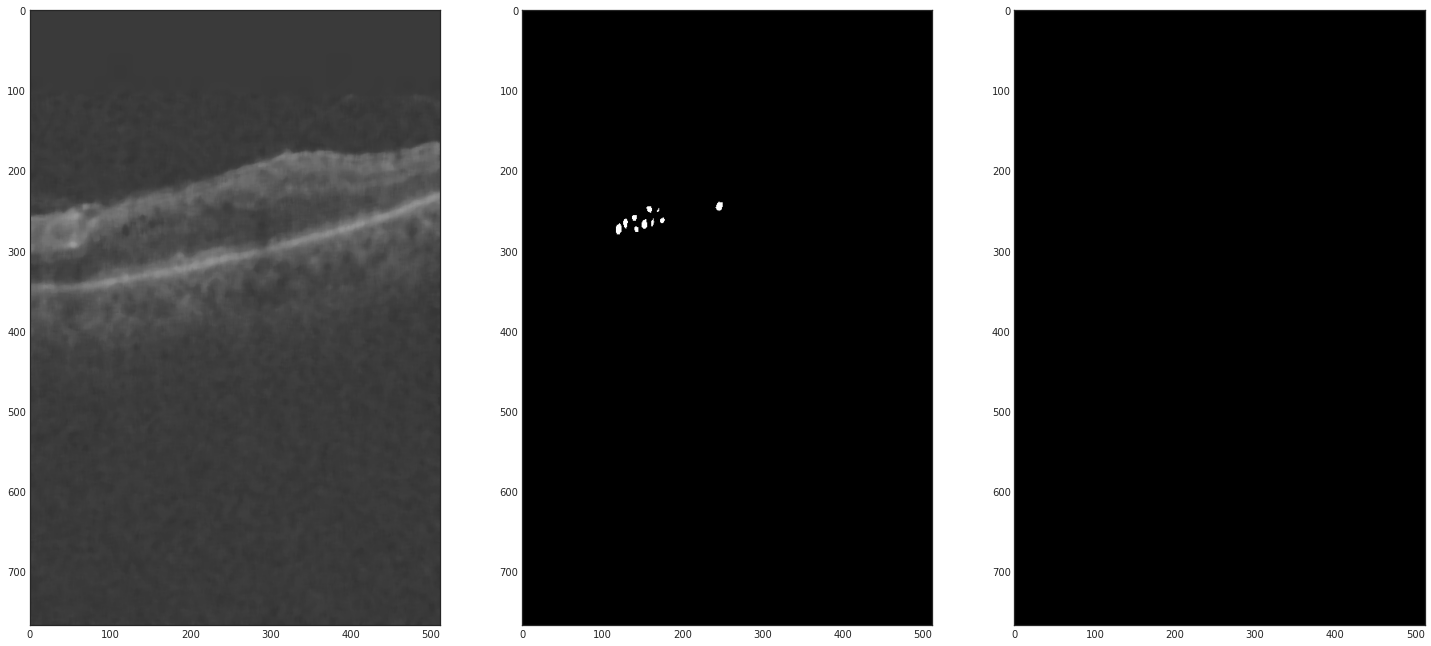

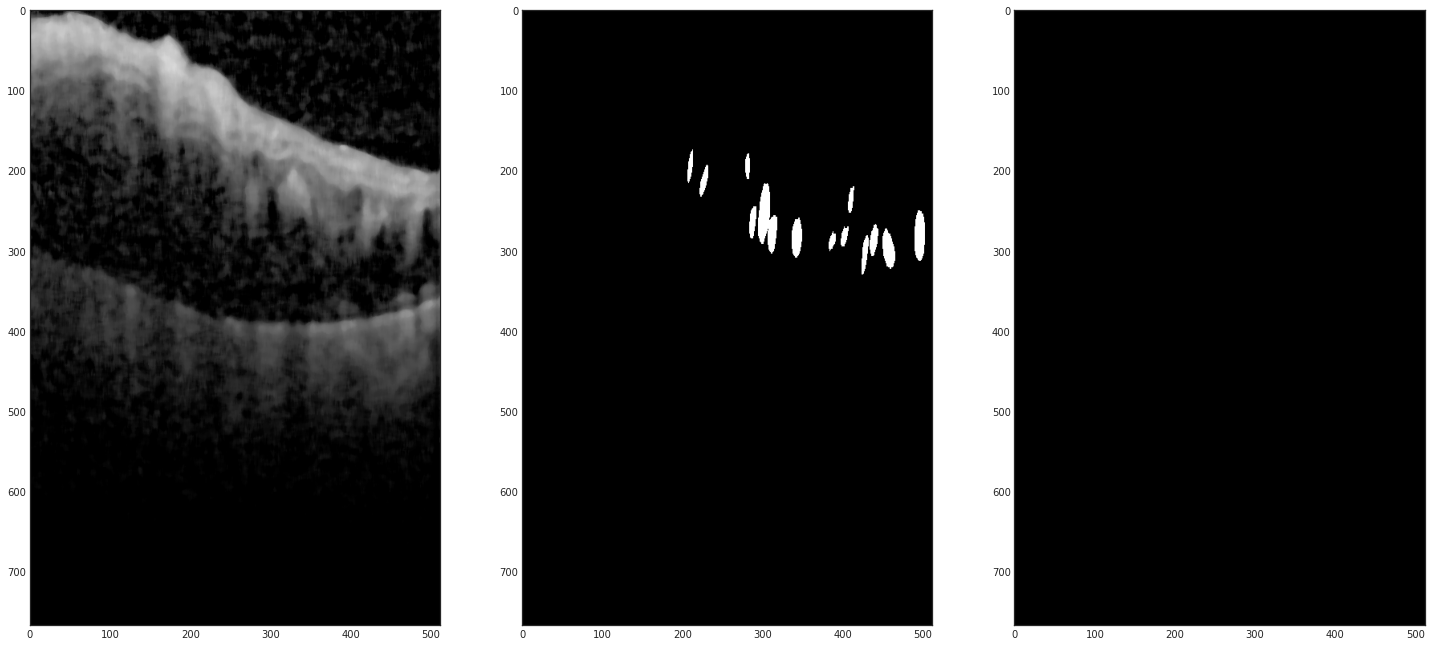

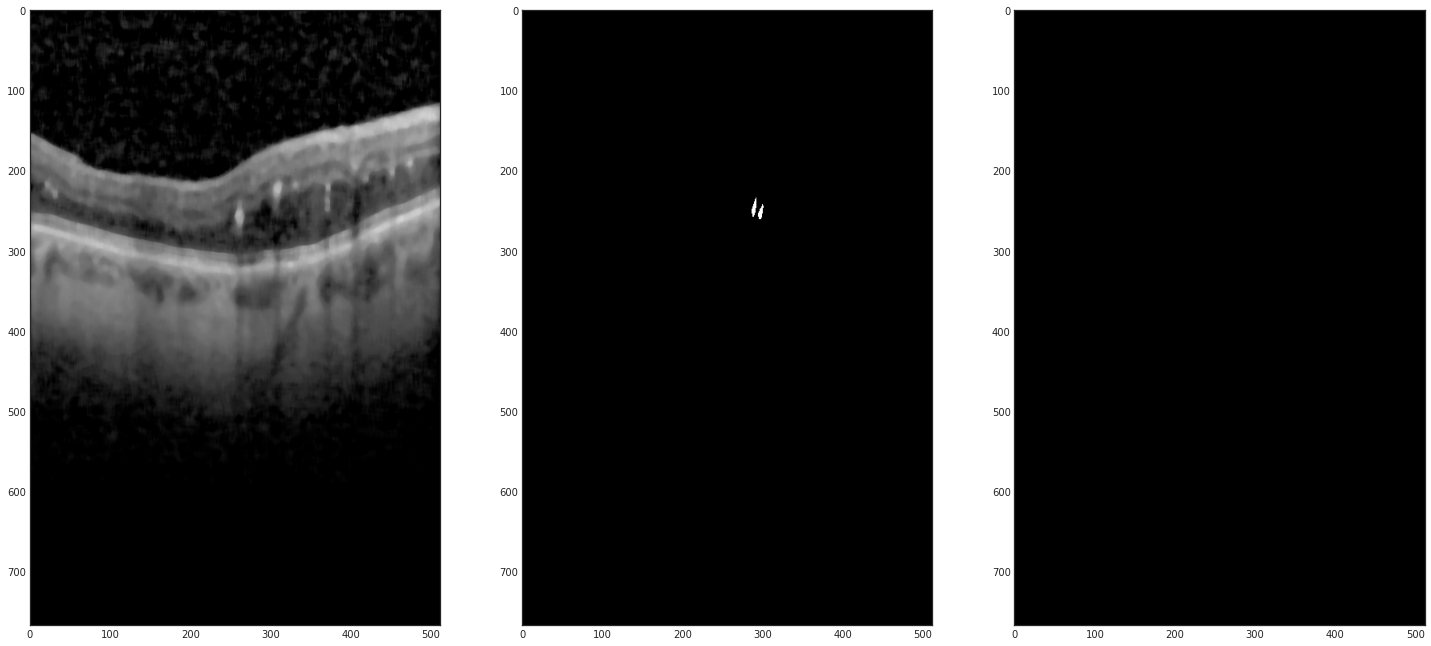

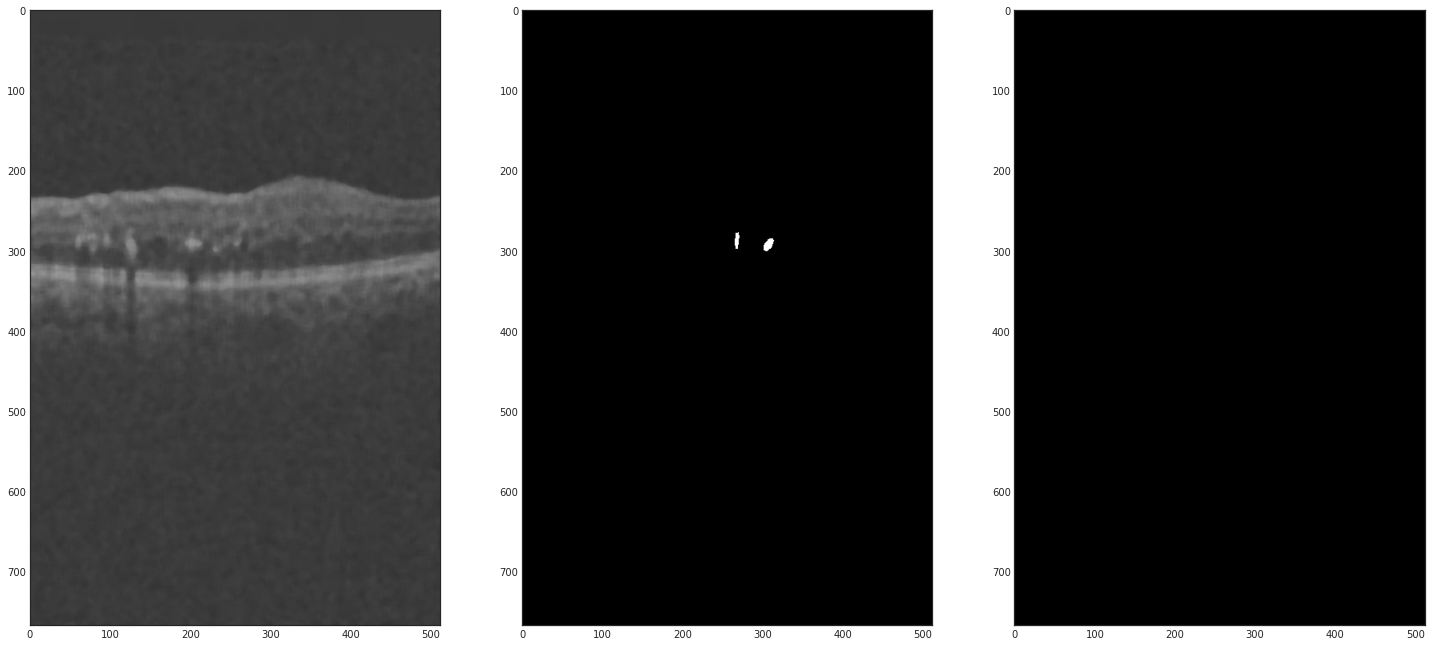

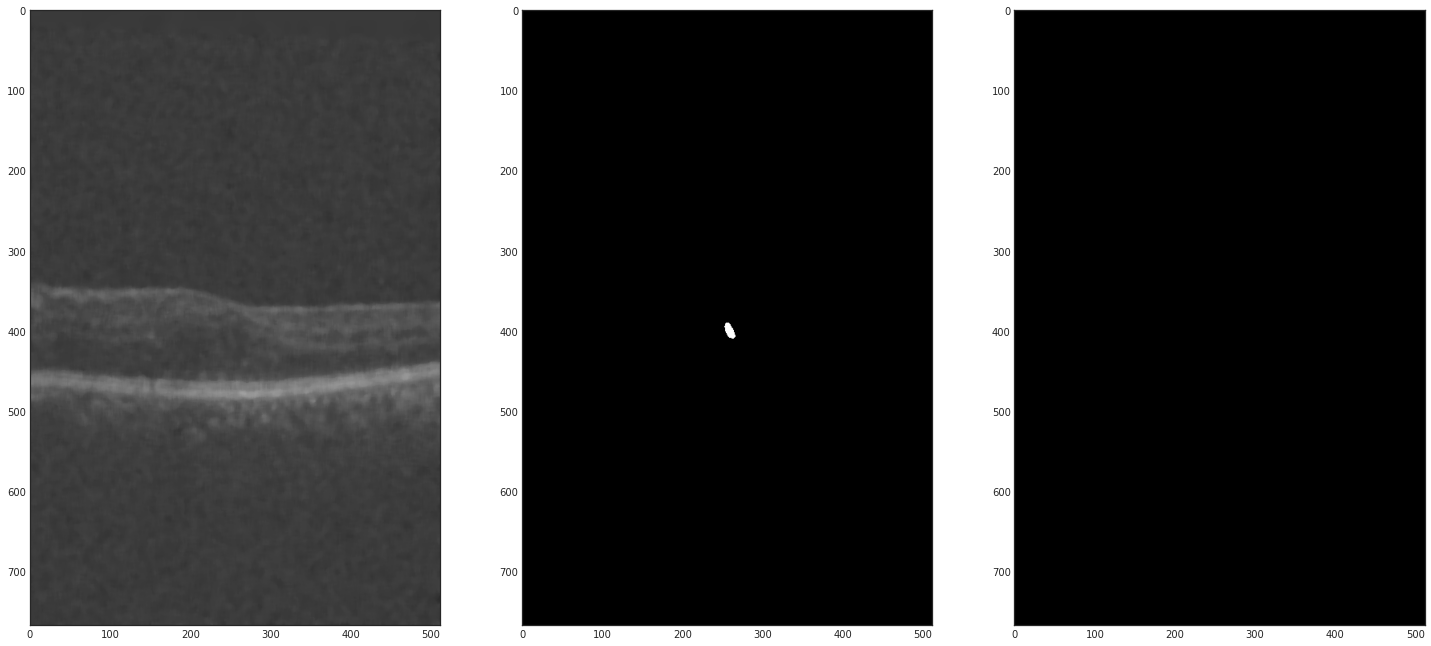

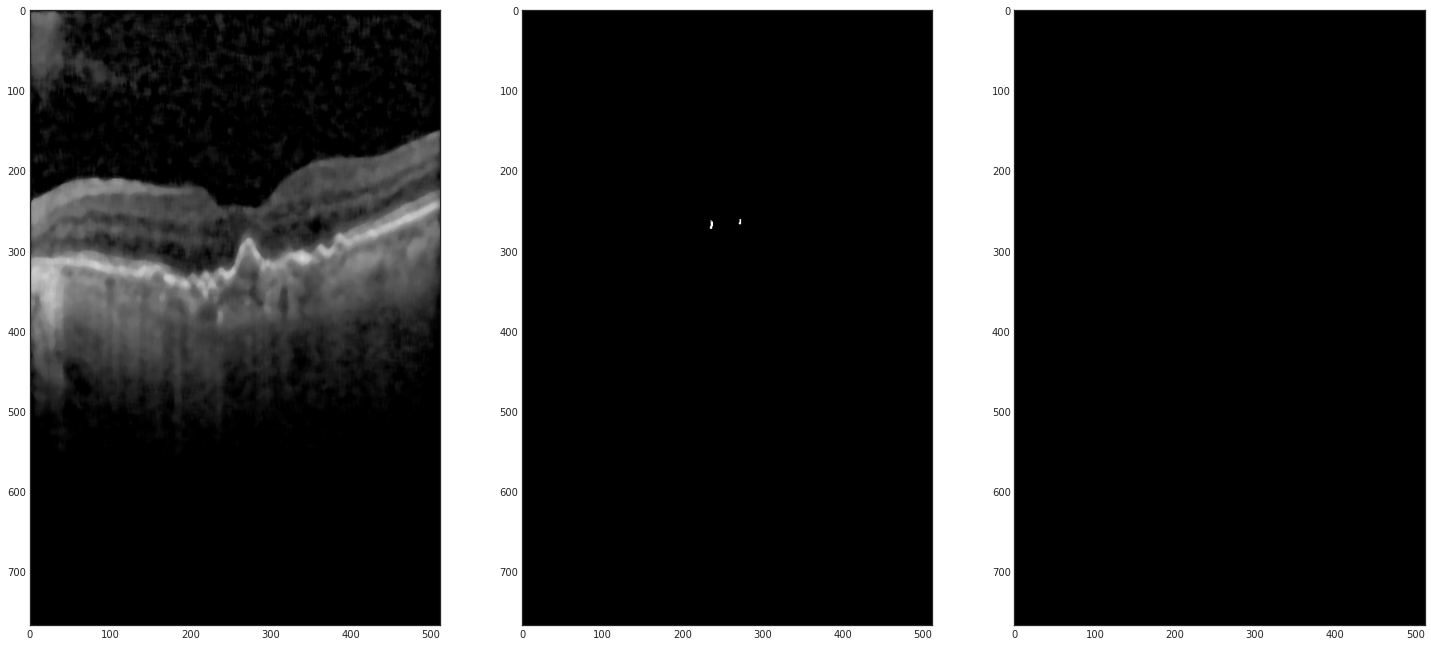

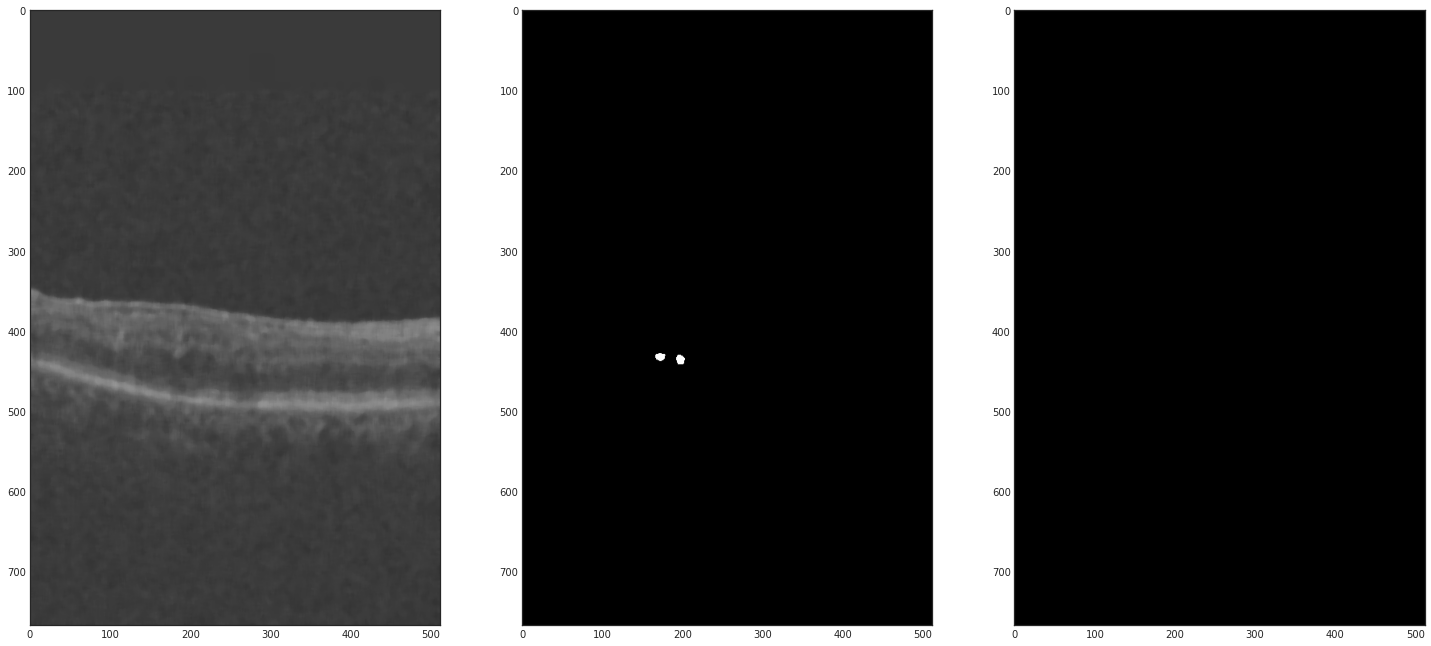

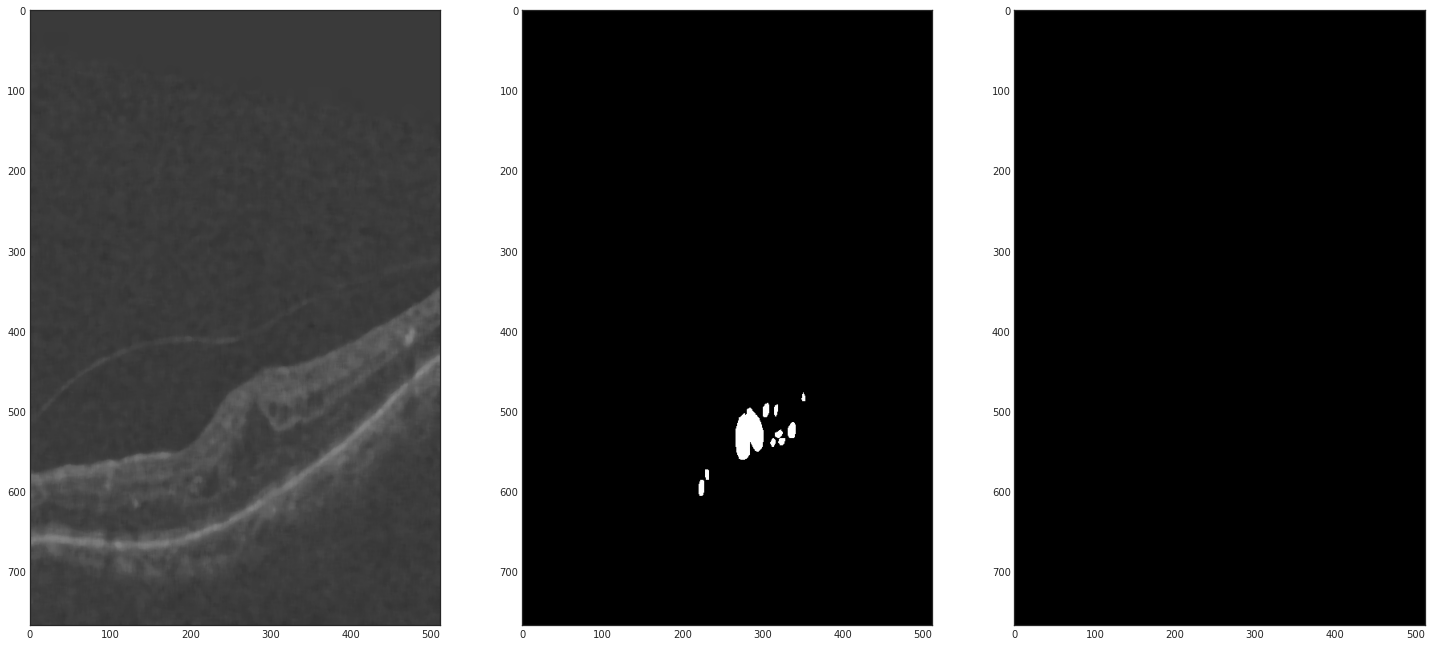

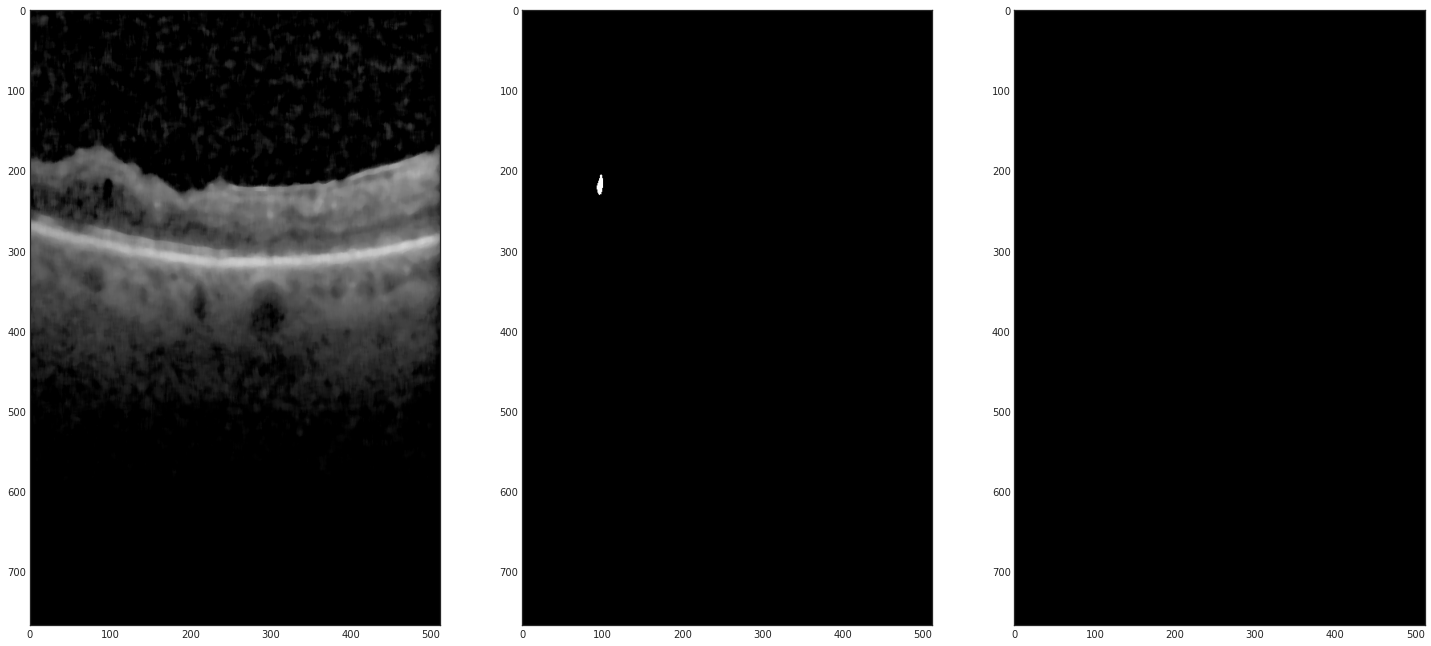

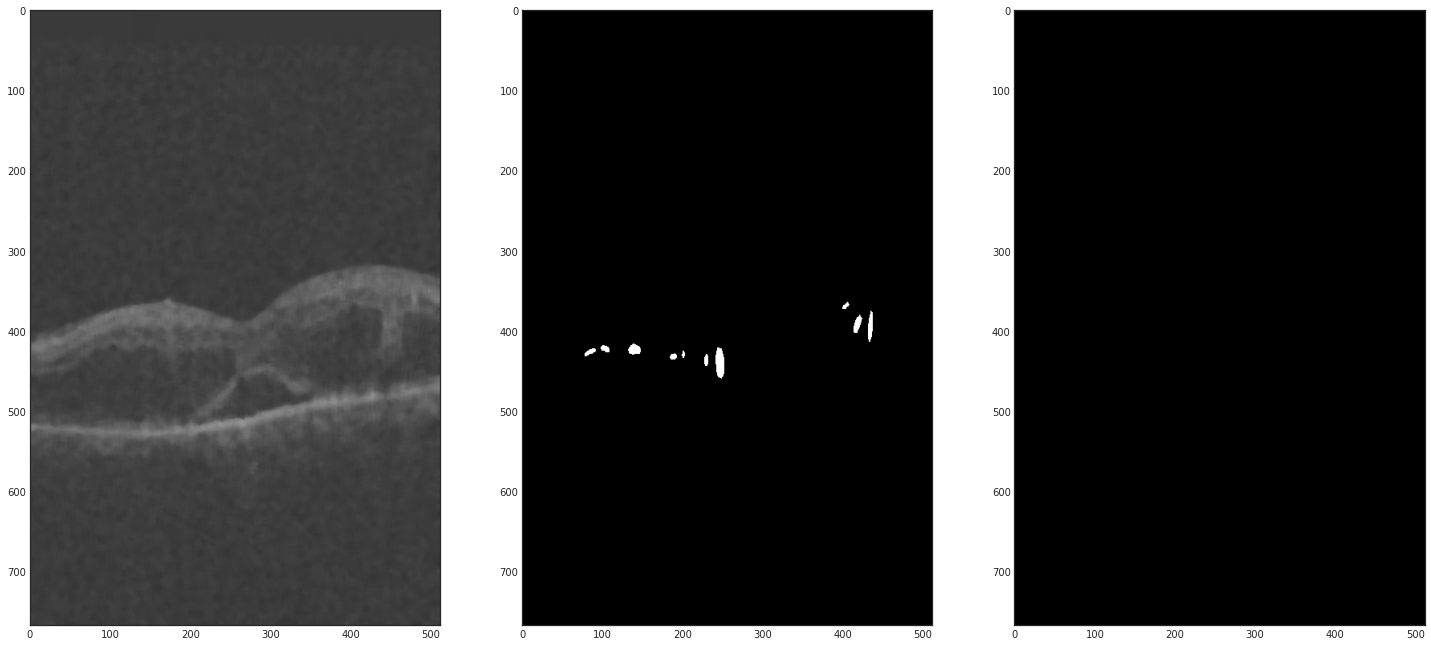

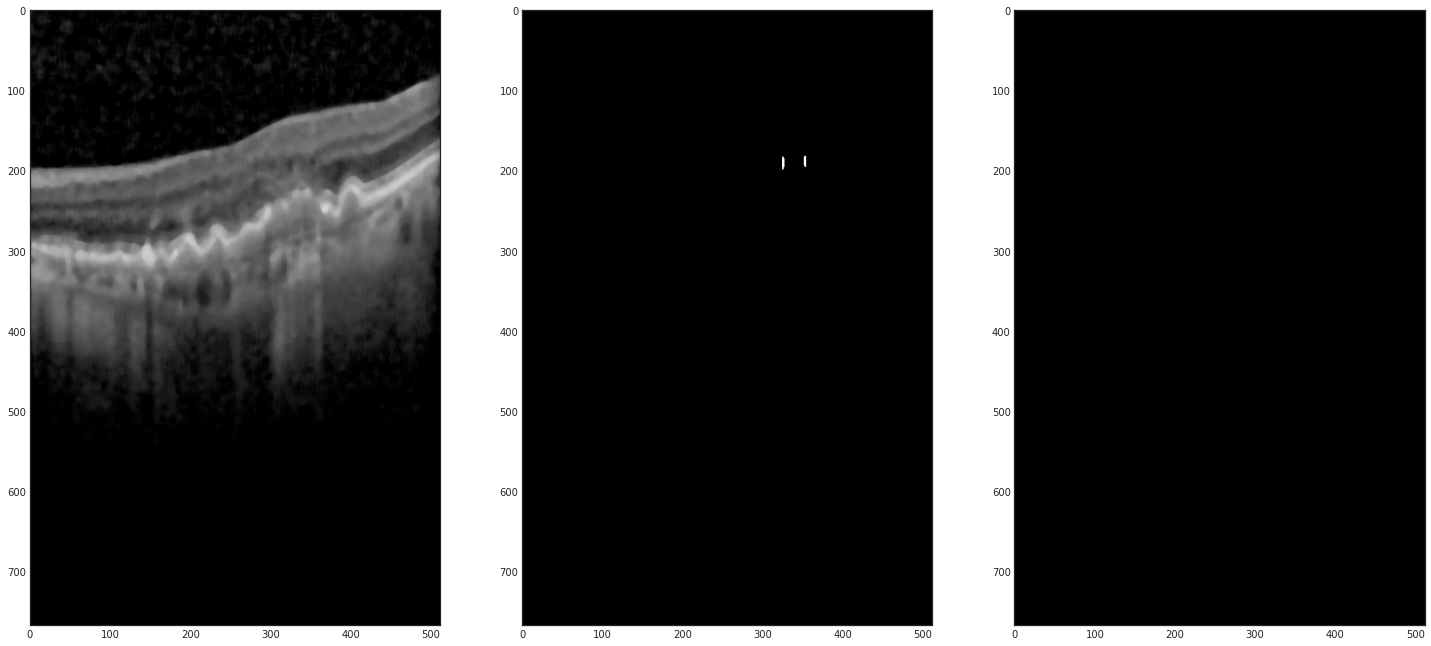

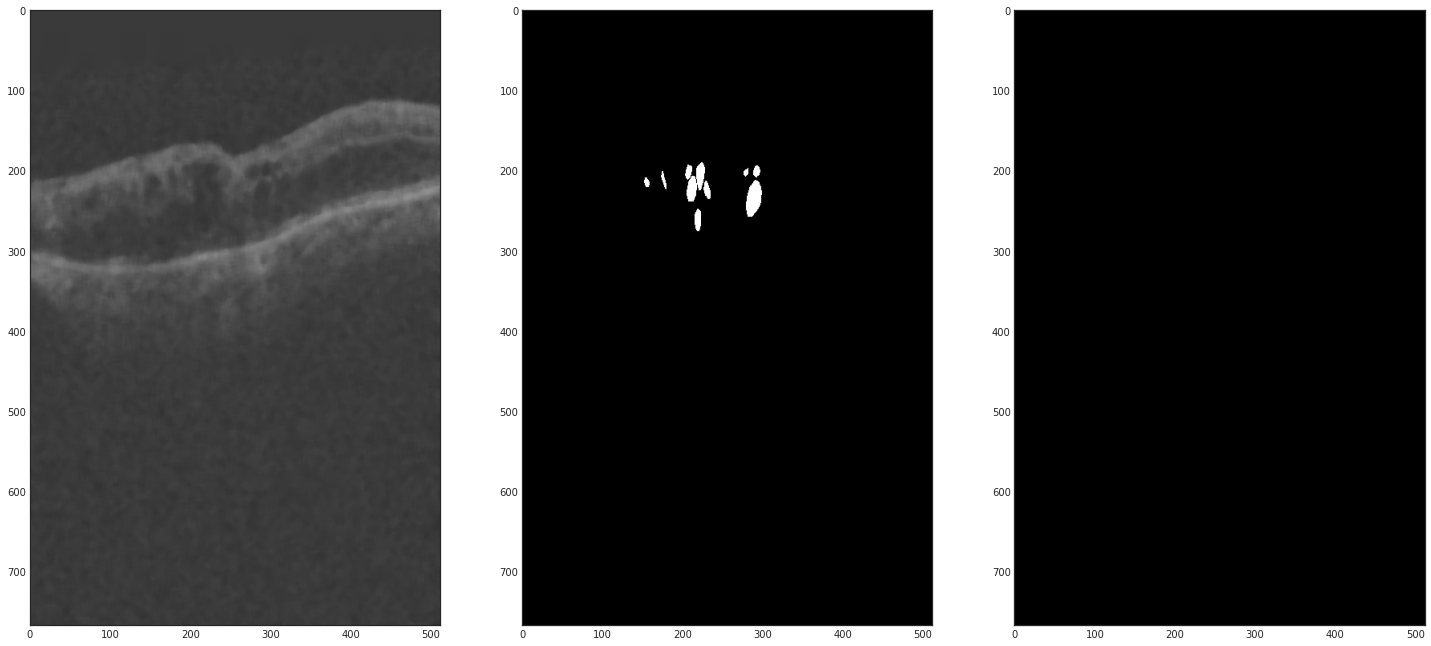

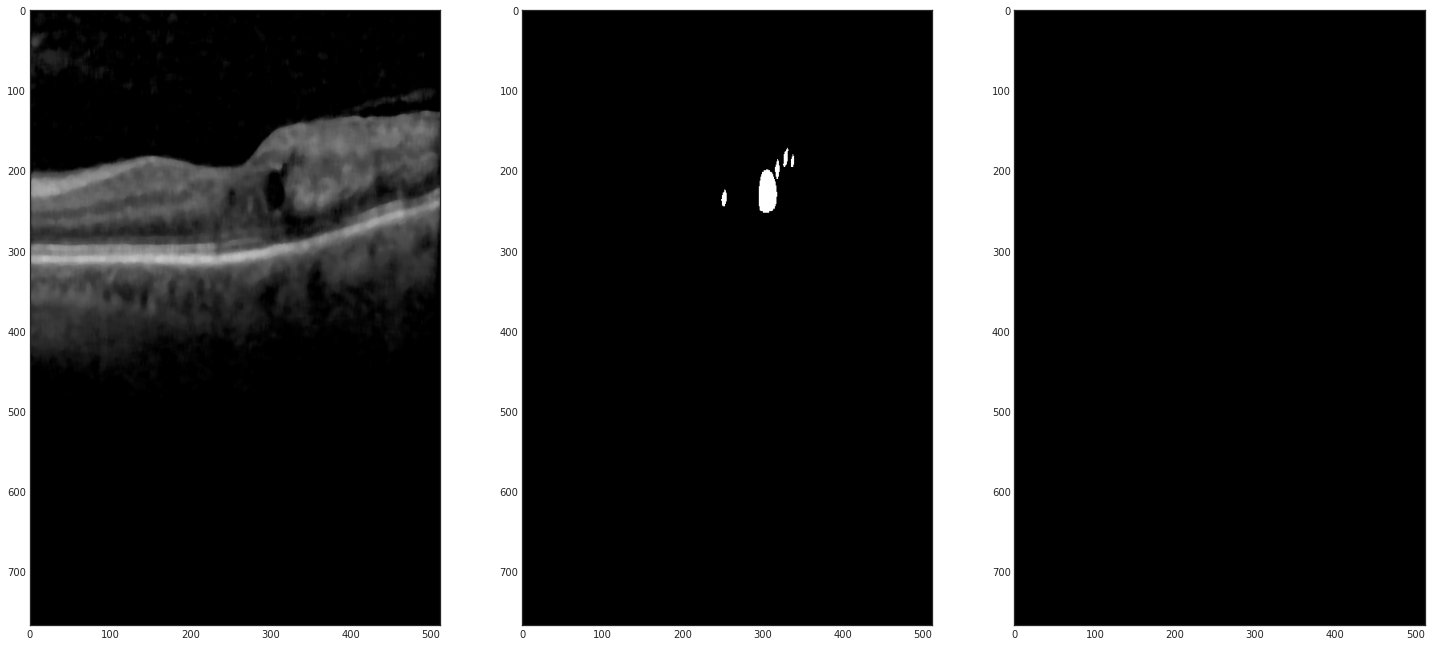

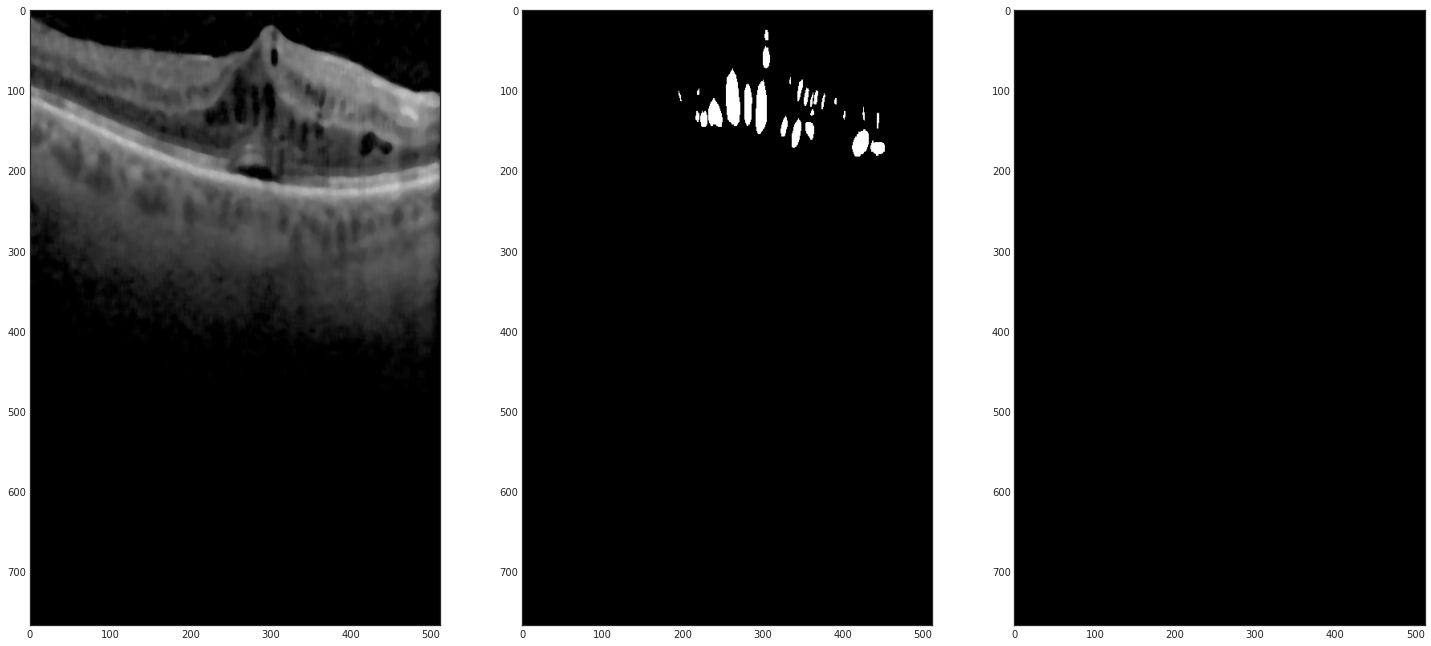

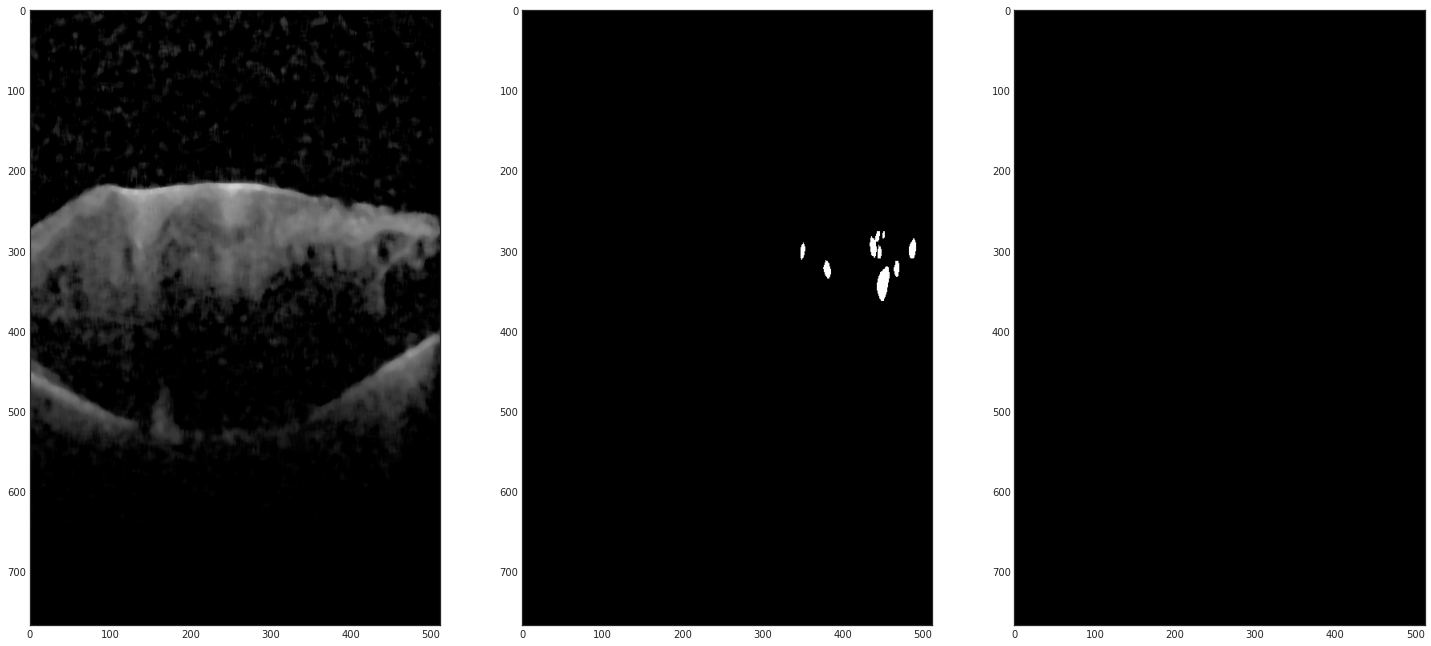

In [ ]:
for test_index in range(36,len(x_val)):
      # test_index=2
        op_val=model.predict(np.expand_dims(x_val[test_index],0))

        plt.figure(figsize=(25,25))
        plt.subplot(131)
        plt.imshow((x_val[test_index]*255).astype('uint8'),cmap='gray')
        plt.subplot(132)
        plt.imshow(y_val[test_index][:,:,0],cmap='gray')
        plt.subplot(133)
        plt.imshow(np.around(op_val[0,:,:,0]),cmap='gray')
        # plt.imshow((op_val[0,:,:,0]),cmap='gray')
        
        plt.show()


In [ ]:
from logging import exception
for files in os.listdir(git_path):
  if '.hdf5' in files:
    try:
      model.load_weights(files)
      print(files)
      for test_index in range(36,len(x_val)):
      # test_index=2
        op_val=model.predict(np.expand_dims(x_val[test_index],0))

        plt.figure(figsize=(25,25))
        plt.subplot(131)
        plt.imshow((x_val[test_index]*255).astype('uint8'),cmap='gray')
        plt.subplot(132)
        plt.imshow(y_val[test_index][:,:,0],cmap='gray')
        plt.subplot(133)
        plt.imshow(np.around(op_val[0,:,:,0]),cmap='gray')
        plt.show()
    except:
      print("Unable to load weights")  


In [ ]:
plt.imshow(np.around(op_val[0,:,:,0]))

In [ ]:
# test_index=4
# op_test=model.predict(np.expand_dims(x_test[test_index],0))

# plt.figure(figsize=(25,25))
# plt.subplot(131)
# plt.imshow((x_test[test_index]*255).astype('uint8'),cmap='gray')
# plt.subplot(132)
# plt.imshow(y_test[test_index][:,:,0],cmap='gray')
# plt.subplot(133)
# plt.imshow(op_test[0,:,:,0],cmap='gray')
# plt.show()
